# Лабораторная работа №1

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt, factorial
sns.set(color_codes=True)

## Постановка задачи

Для 5 распределений:
* Нормальное распределение $N(x,0,1)$;
* Распределение Коши $C(x,0,1)$;
* Распределение Лапласа $L(x,0,\frac{1}{\sqrt{2}})$;
* Распределение Пуассона $P(k,10)$;
* Равномерное распределение $U(x,-\sqrt{3},\sqrt{3})$

Сгенерировать выборки размером 10, 50 и 1000 элементов. Построить на одном рисунке гистограмму и график плотности распределения.

## Теория
### Распределения
* Нормальное распределение
$$N(x,0,1)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$
* Распределение Коши
$$C(x,0,1)=\frac{1}{\pi}\frac{1}{x^2+1}$$
* Распределение Лапласа
$$L(x,0,\frac{1}{\sqrt{2}})=\frac{1}{\sqrt{2}}e^{-\sqrt{2}|x|}$$
* Распределение Пуассона
$$P(k,10)=\frac{10^k}{k!}e^{-10}$$
* Равномерное распределение
$$\begin{equation}
    U(x,-\sqrt{3}, \sqrt{3}) = 
	\begin{cases}
        \frac{1}{2\sqrt{3}} &\vert x\vert \leqslant \sqrt{3}\\
        0 &\vert x\vert > \sqrt{3}
	\end{cases}
\end{equation}$$

### Гистограмма
#### Определение
Гистограмма в математической статистике — это функция, приближающая плотность вероятности некоторого распределения, построенная на основе выборки из него.
#### Графическое описание
Графически гистограмма строится следующим образом. Сначала множество значений, которое может принимать элемент выборки, разбивается на несколько интервалов. Чаще всего эти интервалы берут одинаковыми, но это не является строгим требованием. Эти интервалы откладываются на горизонтальной оси, затем над каждым рисуется прямоугольник. Если все интервалы были одинаковыми, то высота каждого прямоугольника пропорциональна числу элементов выборки, попадающих в соответствующий интервал. Если интервалы разные, то высота прямоугольника выбирается таким образом, чтобы его площадь была пропорциональна числу элементов выборки, которые попали в этот интервал.
#### Использование
Гистограммы применяются в основном для визуализации данных на начальном этапе статистической обработки. Построение гистограмм используется для получения эмпирической оценки плотности распределения случайной величины. Для построения гистограммы наблюдаемый диапазон изменения случайной величины разбивается на несколько интервалов и подсчитывается доля от всех измерений, попавшая в каждый из интервалов. Величина каждой доли, отнесенная к величине интервала, принимается в качестве оценки значения плотности распределения на соответствующем интервале.

## Реализация

In [47]:
# Normal distribution
normal_distribution = {
    'distrib' : np.random.standard_normal,
    'pdf' : stats.norm.pdf,
    'title' : "Нормальное распределение $N(x,0,1)$",
    'name' : "Normal distribution",
}

# Cauchy distribution
cauchy_distribution = {
    'distrib' : np.random.standard_cauchy,
    'pdf' : stats.cauchy.pdf,
    'title' : "Распределение Коши $C(x,0,1)$",
    'name' : "Cauchy distribution",
}

# Laplace distribution
laplace_param = [0, 1 / sqrt(2)] # mu, lambda
laplace_distribution = {
    'distrib' : lambda n: np.random.laplace(laplace_param[0], laplace_param[1], n),
    'pdf' : lambda x: stats.laplace.pdf(x, laplace_param[0], laplace_param[1]),
    'title' : "Распределение Лапласа $L(x,0,1 / \sqrt{2})$",
    'name' : "Laplace distribution",
}

# Poisson distribution
poisson_param = 10 # mu
poisson_distribution = {
    'distrib' : lambda n: np.random.poisson(poisson_param, n),
    'pdf' : lambda x: (np.power(x, poisson_param) / np.math.factorial(poisson_param)) * np.exp(-x),
    'title' : "Распределение Пуассона $P(k,10)$",
    'name' : "Poisson distribution",
}

# Uniform distribution
segment = [-sqrt(3), sqrt(3)]
uniform_distribution = {
    'distrib' : lambda n: np.random.uniform(segment[0], segment[1], n),
    'pdf' : lambda x: stats.uniform.pdf(x, segment[0], segment[1] - segment[0]),
    'title' : "Равномерное распределение $U(x,-\sqrt{3},\sqrt{3})$",
    'name' : "Uniform distribution",
}

In [51]:
def ResearchDistibution(distribution, n, basket_num):
    np.random.seed(42)
    print(distribution['name'] + ':')
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), squeeze=False)
    # fig.suptitle(distribution['title'], fontsize=25)
    for i in range(len(n)):
        x = distribution['distrib'](n[i])
        ax = axes[np.unravel_index(i, shape=axes.shape)]
        ax.set_title("n = " + str(n[i]), fontsize=16, fontweight="bold")
        
        # Create the bins and histogram
        _, bins, _ = ax.hist(x, basket_num[i], density=True, alpha=0.8)
        # Plot the distribution curve
        ax.plot(bins, distribution['pdf'](bins), linewidth=3, color='r')
        ax.set_ylabel("Density")
        ax.set_xlabel("Numbers")
    fig.savefig("pictures/" + distribution['name'])
    plt.show()

In [52]:
n = [10, 50, 1000]
basket_num = [10, 20, 25]

distributions = [normal_distribution,
                 cauchy_distribution,
                 laplace_distribution,
                 poisson_distribution,
                 uniform_distribution]

Normal distribution:


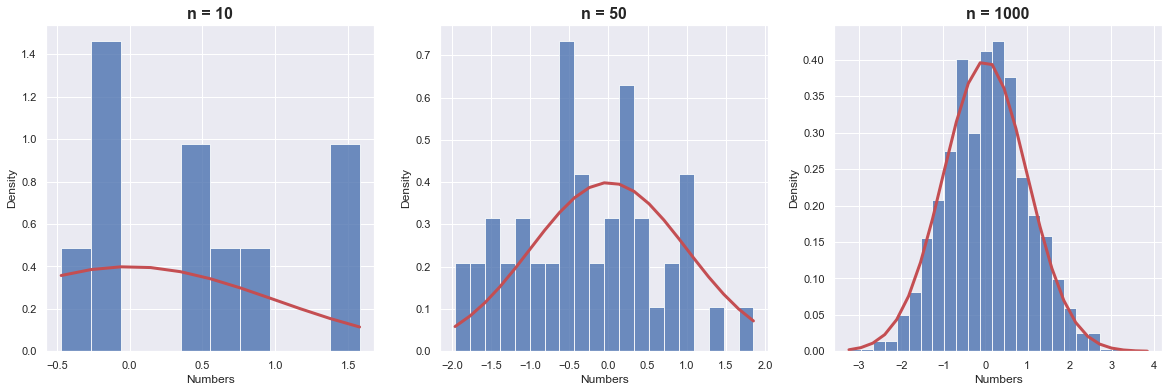

Cauchy distribution:


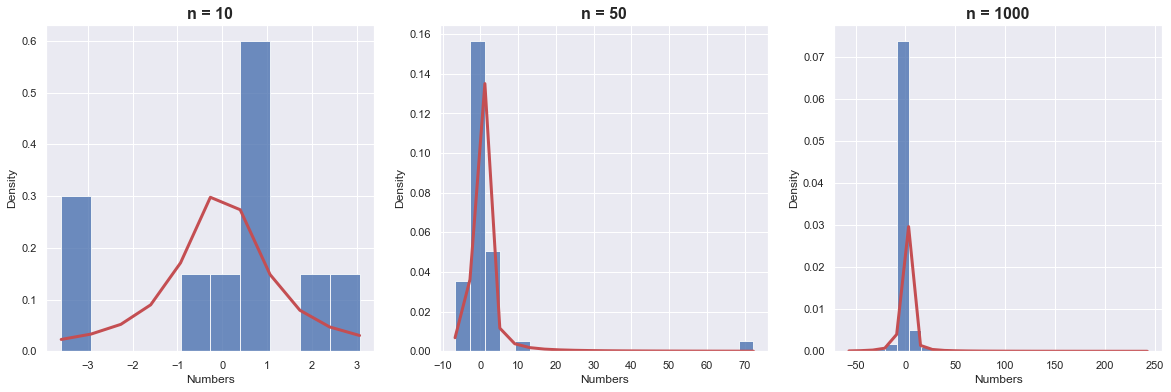

Laplace distribution:


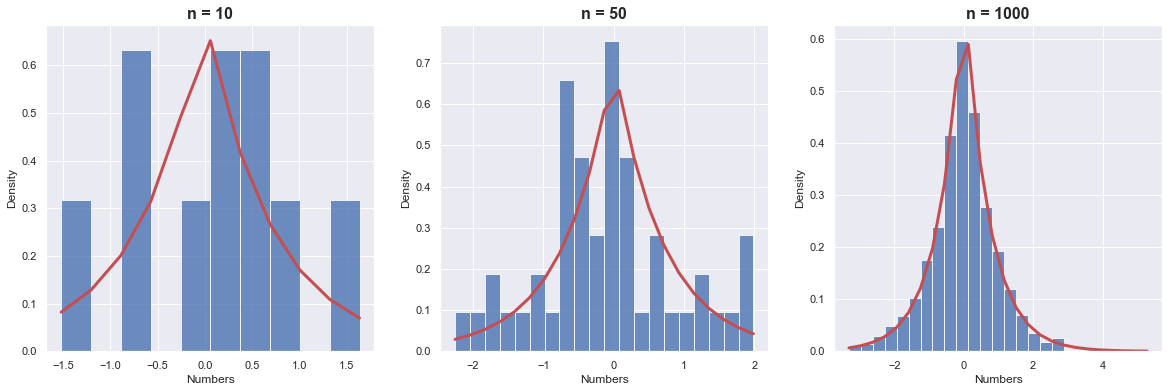

Poisson distribution:


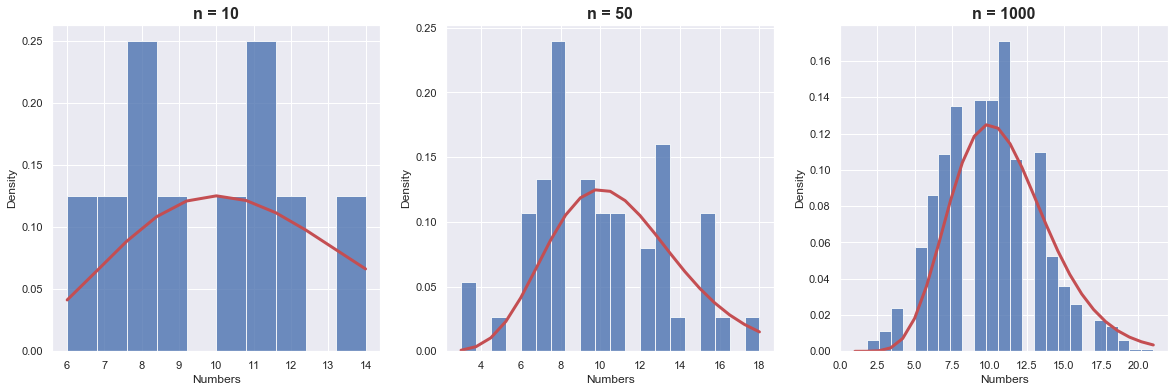

Uniform distribution:


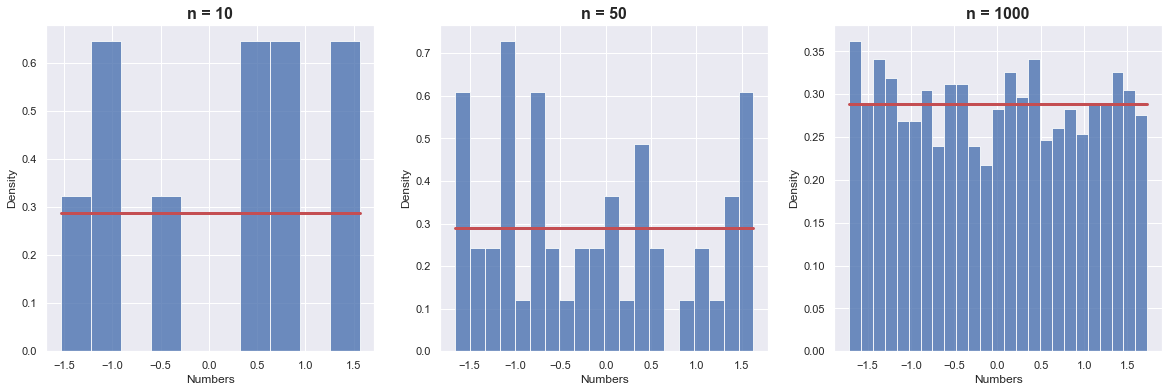

In [53]:
for distrib in distributions:
    ResearchDistibution(distrib, n, basket_num)